### Here let's go through an example where we have a spatially inhomogenous data 

Similar to spatially adaptive splines we can preset our difference matrix for better performance

In [1]:
import sys

sys.path.append("../")
sys.path.append("../../")

import numpy as np
from matplotlib import pyplot as plt

from matrix_algorithms.difference_matrix import Difference_Matrix
from cv_tf import cross_validation
from adaptive_tf import adaptive_tf

from evaluation_metrics.loss_functions import compute_error

array([[ 3.95073827],
       [ 3.74123981],
       [ 3.82989257],
       [ 4.00267883],
       [ 4.01012508],
       [ 3.26767396],
       [ 4.1627325 ],
       [ 3.8369427 ],
       [ 4.32840588],
       [ 4.58990303],
       [ 4.96735311],
       [ 4.23950006],
       [ 4.43444617],
       [ 4.77428184],
       [ 3.91514377],
       [ 4.13504335],
       [ 3.78595376],
       [ 5.33261227],
       [ 4.18663728],
       [ 4.91062656],
       [ 4.15526549],
       [ 5.55432379],
       [ 5.13525054],
       [ 4.96821649],
       [ 4.79909849],
       [ 4.27631111],
       [ 4.11573565],
       [ 4.51623473],
       [ 4.35024649],
       [ 4.50345522],
       [ 5.02002854],
       [ 5.2994289 ],
       [ 4.62102694],
       [ 5.21408921],
       [ 5.15437237],
       [ 4.03553258],
       [ 5.41847635],
       [ 5.3438824 ],
       [ 3.87037681],
       [ 5.13789991],
       [ 5.27288645],
       [ 5.95883538],
       [ 4.6686818 ],
       [ 4.96735206],
       [ 4.94881009],
       [ 6

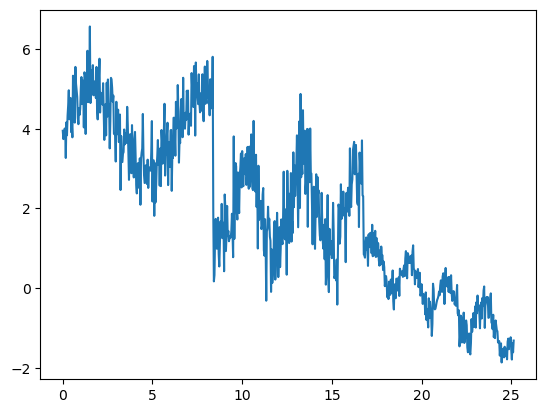

In [103]:
def generate_spatially_inhomogenous_data():

    # generate data
    n = 250

    x = np.zeros( 3 * n)

        # generate time
    t = np.linspace(0, 8*np.pi, 3 * n)
    t1=t[0:n]
    t2=t[n:2*n]
    t3=t[2*n:3*n]

    # generate spatially inhomogenous data
    x[0:n] = np.sin(t1) + np.random.normal(0, 0.5, n)+4
    x[n:2*n] = np.sin(2*t2) + np.random.normal(0, 0.65, n)+2
    x[2*n:3*n] = 0.5*np.sin(3*t3) + np.random.normal(0, 0.25, n)-0.25*t3+5



    return x, t
    

x,t=generate_spatially_inhomogenous_data()

plt.plot(t,x)

x=x.reshape(-1,1)
x


In [104]:
D=Difference_Matrix(len(t), 2)

best_lambda=cross_validation(x,D,5,3)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 19.391212686952162
Performing cross validation for lambda = 193.91212686952164
Performing cross validation for lambda = 1939.1212686952163
Performing cross validation for lambda = 19391.212686952163
No solution found for lambda = 19391.212686952163
Status: maxiter exceeded
Performing cross validation for lambda = 193912.12686952163
No solution found for lambda = 193912.12686952163
Status: maxiter exceeded
Performing  1 out of 3 iterations of cross validation
Performing cross validation for lambda = 22.010387790948947
Performing cross validation for lambda = 220.10387790948948
Performing cross validation for lambda = 2201.038779094895
Performing cross validation for lambda = 22010.38779094895
No solution found for lambda = 22010.38779094895
Status: maxiter exceeded
Performing cross validation for lambda = 220103.87790948947
No solution found for lambda = 220103.87790948947
Status: maxiter exce

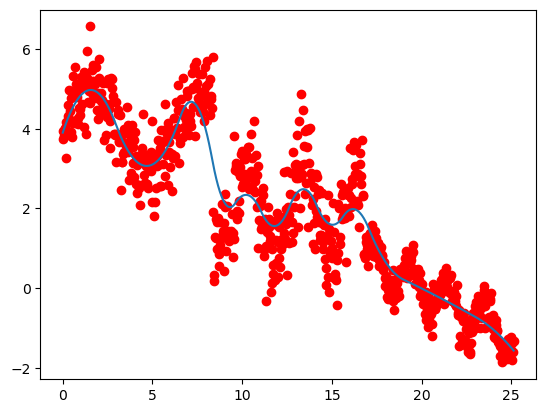

In [105]:
results=adaptive_tf(x,D,best_lambda)

sol=results['sol'].x.reshape(-1,1)

plt.plot(t,sol,label='solution')
plt.scatter(t,x,label='data',color='red')


In [108]:
compute_error(x,sol)

0.4735198040508785

In [119]:
prior=np.concatenate((4*np.ones(250),0.75*np.ones(250),2*np.ones(250)))

D=Difference_Matrix(len(t), 2,prior=prior)

D.D

array([[  4., -12.,  12., ...,   0.,   0.,   0.],
       [  0.,   4., -12., ...,   0.,   0.,   0.],
       [  0.,   0.,   4., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,  -2.,   0.,   0.],
       [  0.,   0.,   0., ...,   6.,  -2.,   0.],
       [  0.,   0.,   0., ...,  -6.,   6.,  -2.]])

In [120]:

best_lambda=cross_validation(x,D,5,3)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 290.61044845017443
Performing cross validation for lambda = 2906.104484501744
No solution found for lambda = 2906.104484501744
Status: maxiter exceeded
Performing cross validation for lambda = 29061.04484501744
No solution found for lambda = 29061.04484501744
Status: maxiter exceeded
Performing cross validation for lambda = 290610.4484501744
No solution found for lambda = 290610.4484501744
Status: negative duality gap
Performing cross validation for lambda = 2906104.484501744
No solution found for lambda = 2906104.484501744
Status: negative duality gap
Performing  1 out of 3 iterations of cross validation
Performing cross validation for lambda = 32.7831693673176
Performing cross validation for lambda = 327.831693673176
Performing cross validation for lambda = 3278.31693673176
No solution found for lambda = 3278.31693673176
Status: maxiter exceeded
Performing cross validation for lambda = 3278

In [121]:
best_lambda

38.94470852261159

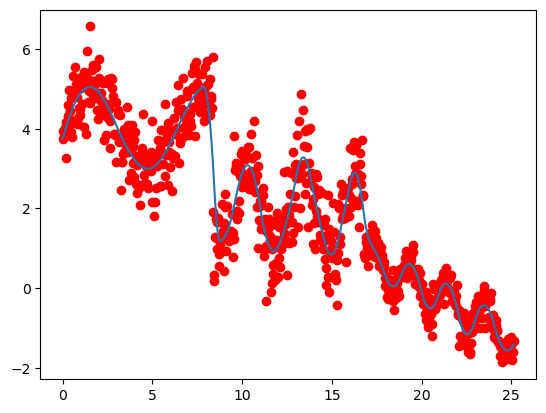

In [122]:
results=adaptive_tf(x,D,best_lambda)

sol=results['sol'].x.reshape(-1,1)

plt.plot(t,sol,label='solution')
plt.scatter(t,x,label='data',color='red')


In [123]:
compute_error(x,sol)

0.2822897392420918